# Loading Dataset

Import Libraries

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
extension = 'csv'
files = glob.glob(f'*.{extension}')

Read files to csv and merge togeter

In [3]:
my_list = []
for i in files:
    my_list.append(i)

df1 = pd.read_csv(my_list[0])
df2 = pd.read_csv(my_list[1])
df3 = pd.read_csv(my_list[-1])

df = pd.concat([df1, df2, df3])

# Data Exploration

In [4]:
df = df.sample(frac=1)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
148,325-77-6186,A,Lagos,Member,Female,Home and lifestyle,32634.0,10,16317.00,342657.00,3/8/2019,10:53,Epay,326340.0,4.761905,16317.00,7.3
94,136-08-6195,A,Lagos,Normal,Female,Home and lifestyle,25185.6,8,10074.24,211559.04,2/15/2019,17:01,Card,201484.8,4.761905,10074.24,6.4
225,752-23-3760,B,Abuja,Member,Female,Sports and travel,23068.8,7,8074.08,169555.68,2/19/2019,19:29,Card,161481.6,4.761905,8074.08,7.3
8,145-94-9061,B,Abuja,Normal,Female,Food and beverages,31809.6,5,7952.40,167000.40,1/25/2019,19:48,Cash,159048.0,4.761905,7952.40,9.6
144,533-33-5337,B,Abuja,Normal,Male,Electronic accessories,28580.4,10,14290.20,300094.20,2/7/2019,20:24,Cash,285804.0,4.761905,14290.20,6.2


In [5]:
df.shape

(1000, 17)

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


In [8]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


Checking for null values

In [9]:
df.notna().sum()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [10]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

No null value

# Dealing With Datetime

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 148 to 50
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage 

From the above info, we can see that Time and Date Columns are not in datetime datatype

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

In [13]:
df[['Time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 148 to 50
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.6 KB


Extraction of features

In [14]:
df['Day'], df['Month'], df['Year'], df['Hour']   = df['Date'].dt.day, df['Date'].dt.month, df['Date'].dt.year, df['Time'].dt.hour

In [15]:
df[['Invoice ID','Day', 'Month', 'Year', 'Hour']]

,Invoice ID,Day,Month,Year,Hour
148,325-77-6186,8,3,2019,10
94,136-08-6195,15,2,2019,17
225,752-23-3760,19,2,2019,19
8,145-94-9061,25,1,2019,19
144,533-33-5337,7,2,2019,20
...,...,...,...,...,...
165,425-85-2085,29,3,2019,16
105,286-01-5402,30,3,2019,13
8,228-96-1411,4,3,2019,20
3,373-73-7910,8,2,2019,10


# Unique Values

In [16]:
df['Hour'].nunique()

11

Checking For Categorical Columns

In [17]:
categorical_columns = [col for col in df.columns if df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [18]:
df['Branch'].unique().tolist()

['A', 'B', 'C']

In [19]:
print("Total Number of unique values in the Branch Column : {}". format(len(df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [20]:
df['Product line'].unique().tolist()

['Home and lifestyle',
 'Sports and travel',
 'Food and beverages',
 'Electronic accessories',
 'Health and beauty',
 'Fashion accessories']

In [21]:
df['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [22]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

# Aggregation

In [23]:
city = df.groupby('City')
city['gross income'].max()

City
Abuja            17528.4
Lagos            17816.4
Port Harcourt    17874.0
Name: gross income, dtype: float64

In [24]:
city.agg({'gross income': 'sum'})

,gross income
City,
Abuja,1820531.52
Lagos,1820577.78
Port Harcourt,1895463.54


In [25]:
city.agg({'Quantity': 'sum'})

,Quantity
City,
Abuja,1820
Lagos,1859
Port Harcourt,1831


# Visualization

Text(0.5, 1.0, 'Sales per Branch')

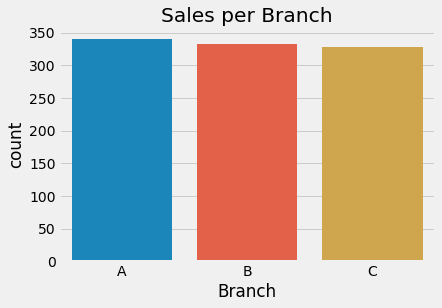

In [26]:
sns.countplot(x=df['Branch']).set_title('Sales per Branch')

Text(0.5, 1.0, 'Sales per product line')

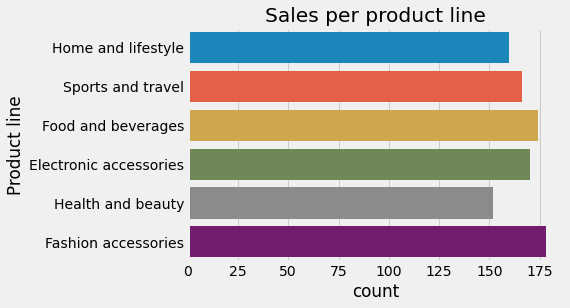

In [27]:
sns.countplot(y='Product line', data=df).set_title("Sales per product line")

<AxesSubplot:xlabel='count', ylabel='Product line'>

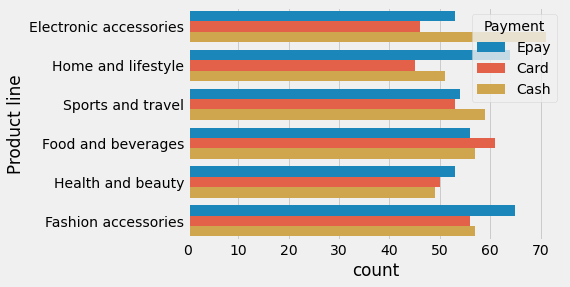

In [28]:
sns.countplot(y='Product line', hue='Payment', data=df)

<AxesSubplot:xlabel='count', ylabel='Payment'>

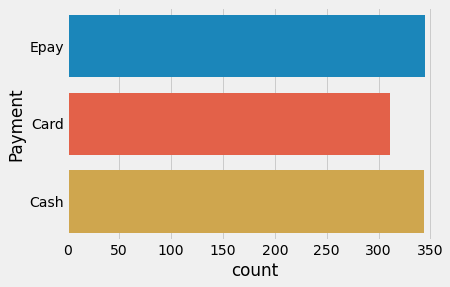

In [29]:
sns.countplot(y='Payment', data=df)

<AxesSubplot:xlabel='Payment', ylabel='count'>

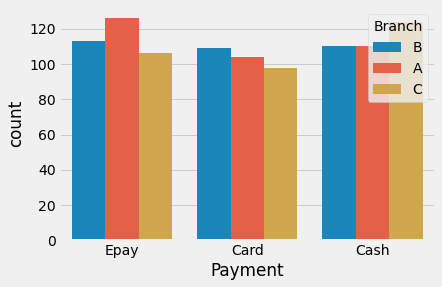

In [30]:
sns.countplot(x='Payment',hue='Branch', data=df)

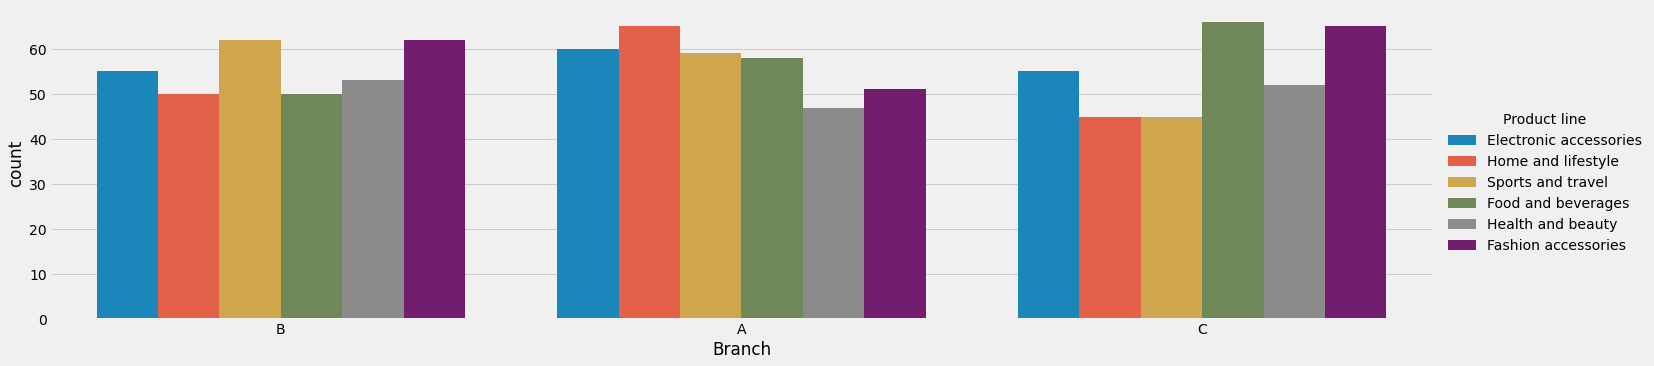

In [31]:
sns.catplot(x='Branch',hue='Product line', data=df, aspect=4, kind='count')

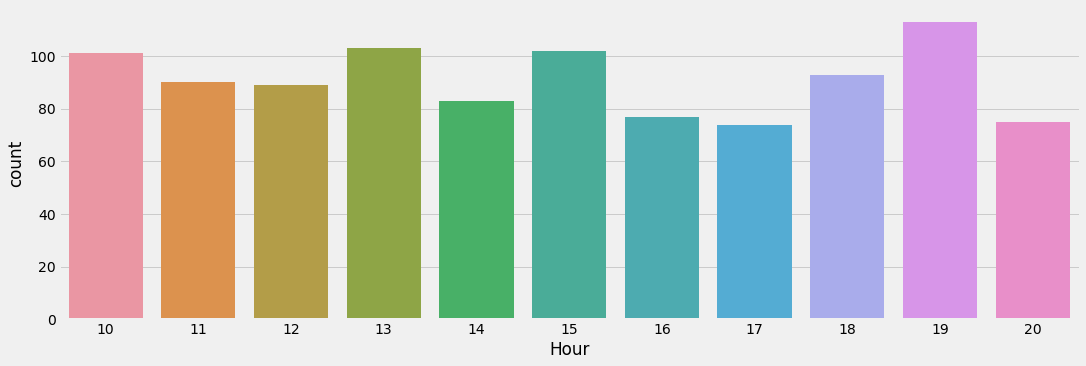

In [32]:
sns.catplot(x='Hour',kind='count', data=df, aspect=3)

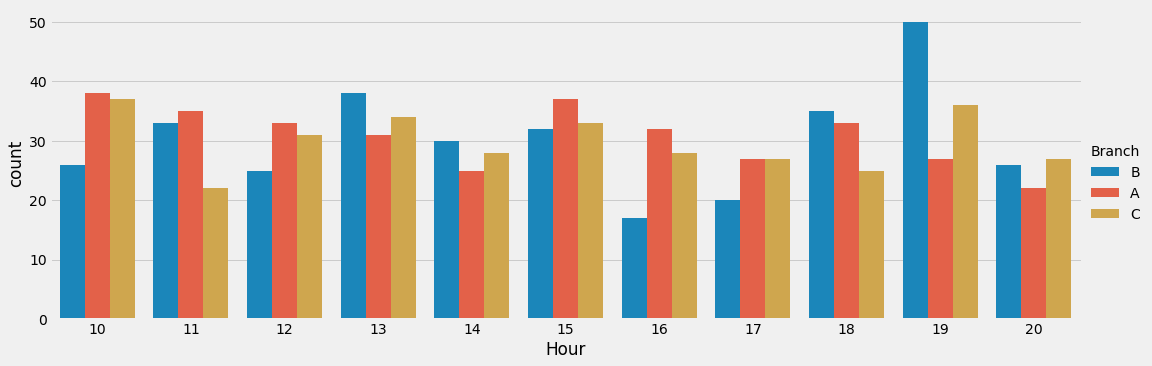

In [33]:
sns.catplot(x='Hour',  hue='Branch',kind='count', data=df, aspect=3)

In [34]:
branch = df.groupby("Branch")
branch.agg({'Rating': 'mean'})

,Rating
Branch,
A,7.027059
B,6.818072
C,7.072866


Text(0.5, 1.0, 'Branch Rating')

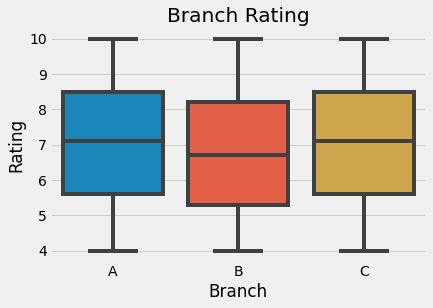

In [28]:
sns.boxplot(x='Branch', y='Rating', data=df).set_title("Branch Rating")

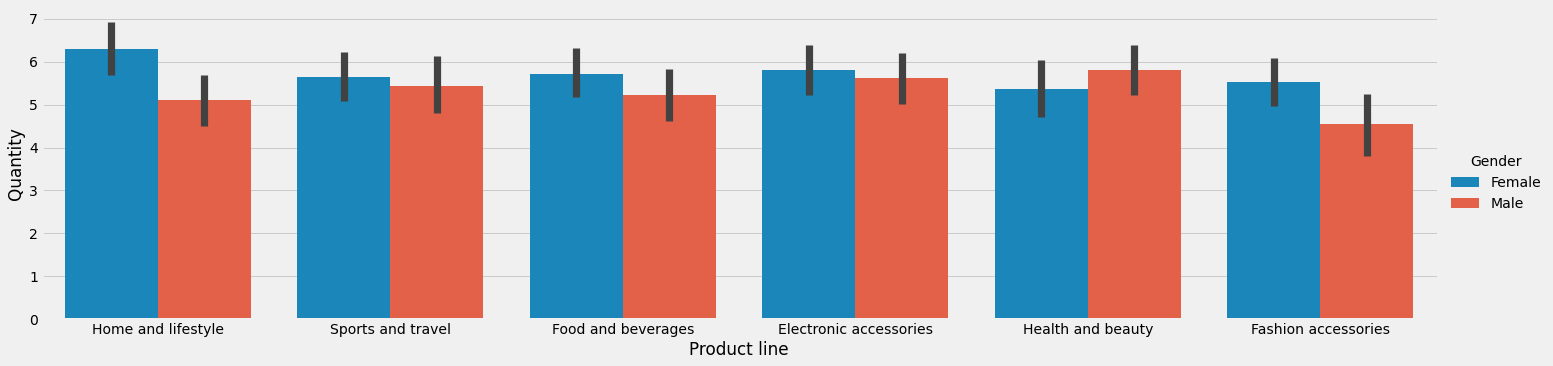

In [29]:
sns.catplot(x='Product line', y='Quantity', hue='Gender', data=df, aspect=4, kind='bar')

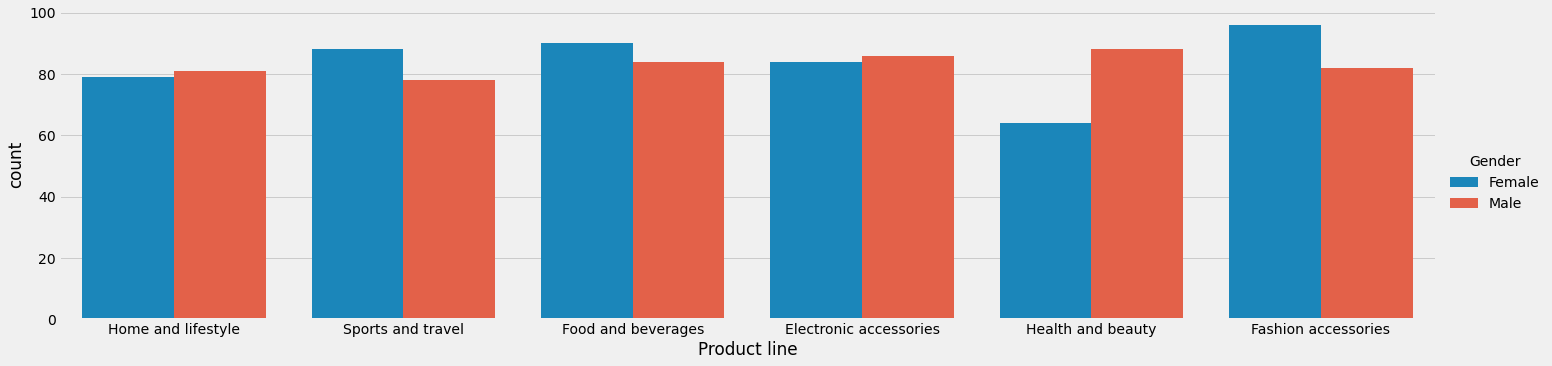

In [30]:
sns.catplot(x='Product line', hue='Gender', data=df, aspect=4, kind='count')

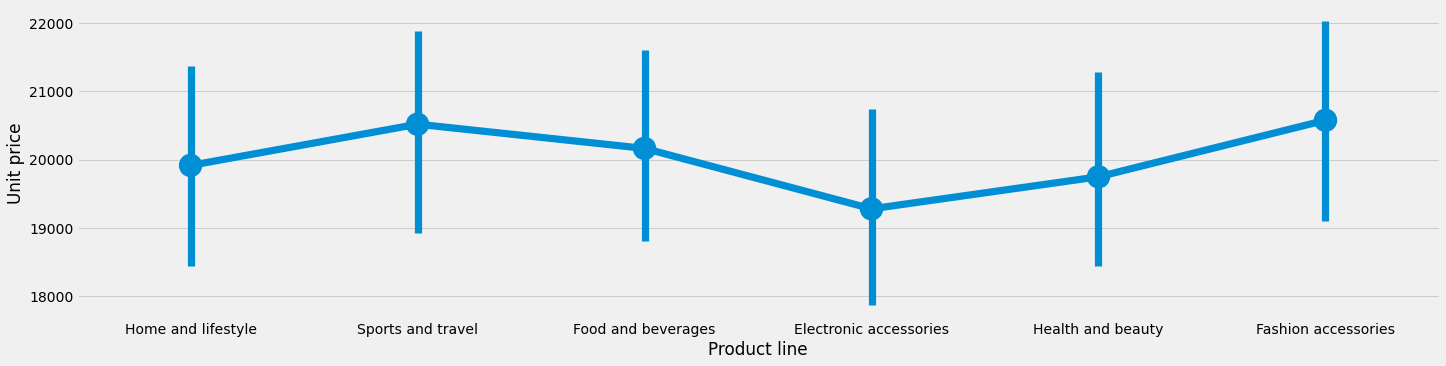

In [31]:
sns.catplot(x='Product line', y='Unit price', data=df, aspect=4, kind='point')

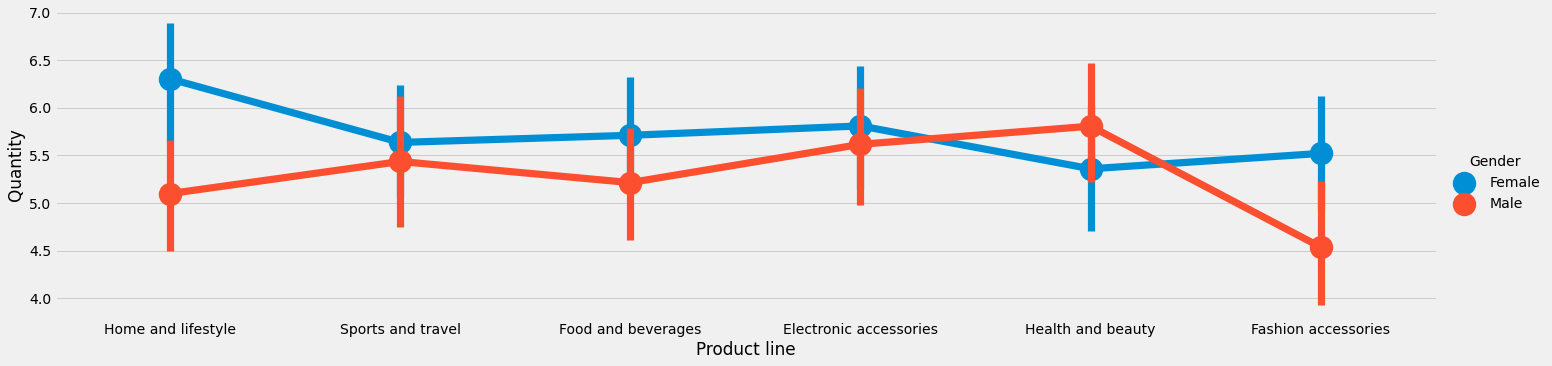

In [32]:
sns.catplot(x='Product line', y='Quantity', data=df, aspect=4, kind='point', hue='Gender')

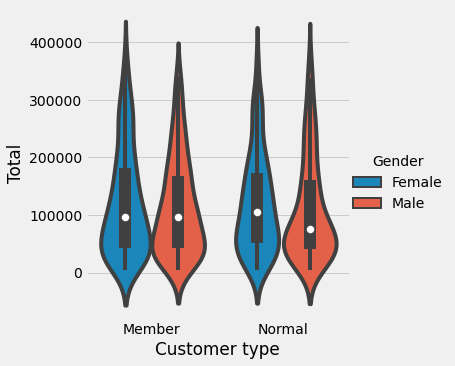

In [33]:
sns.catplot(y="Total", x="Customer type", hue="Gender", kind="violin", data=df)

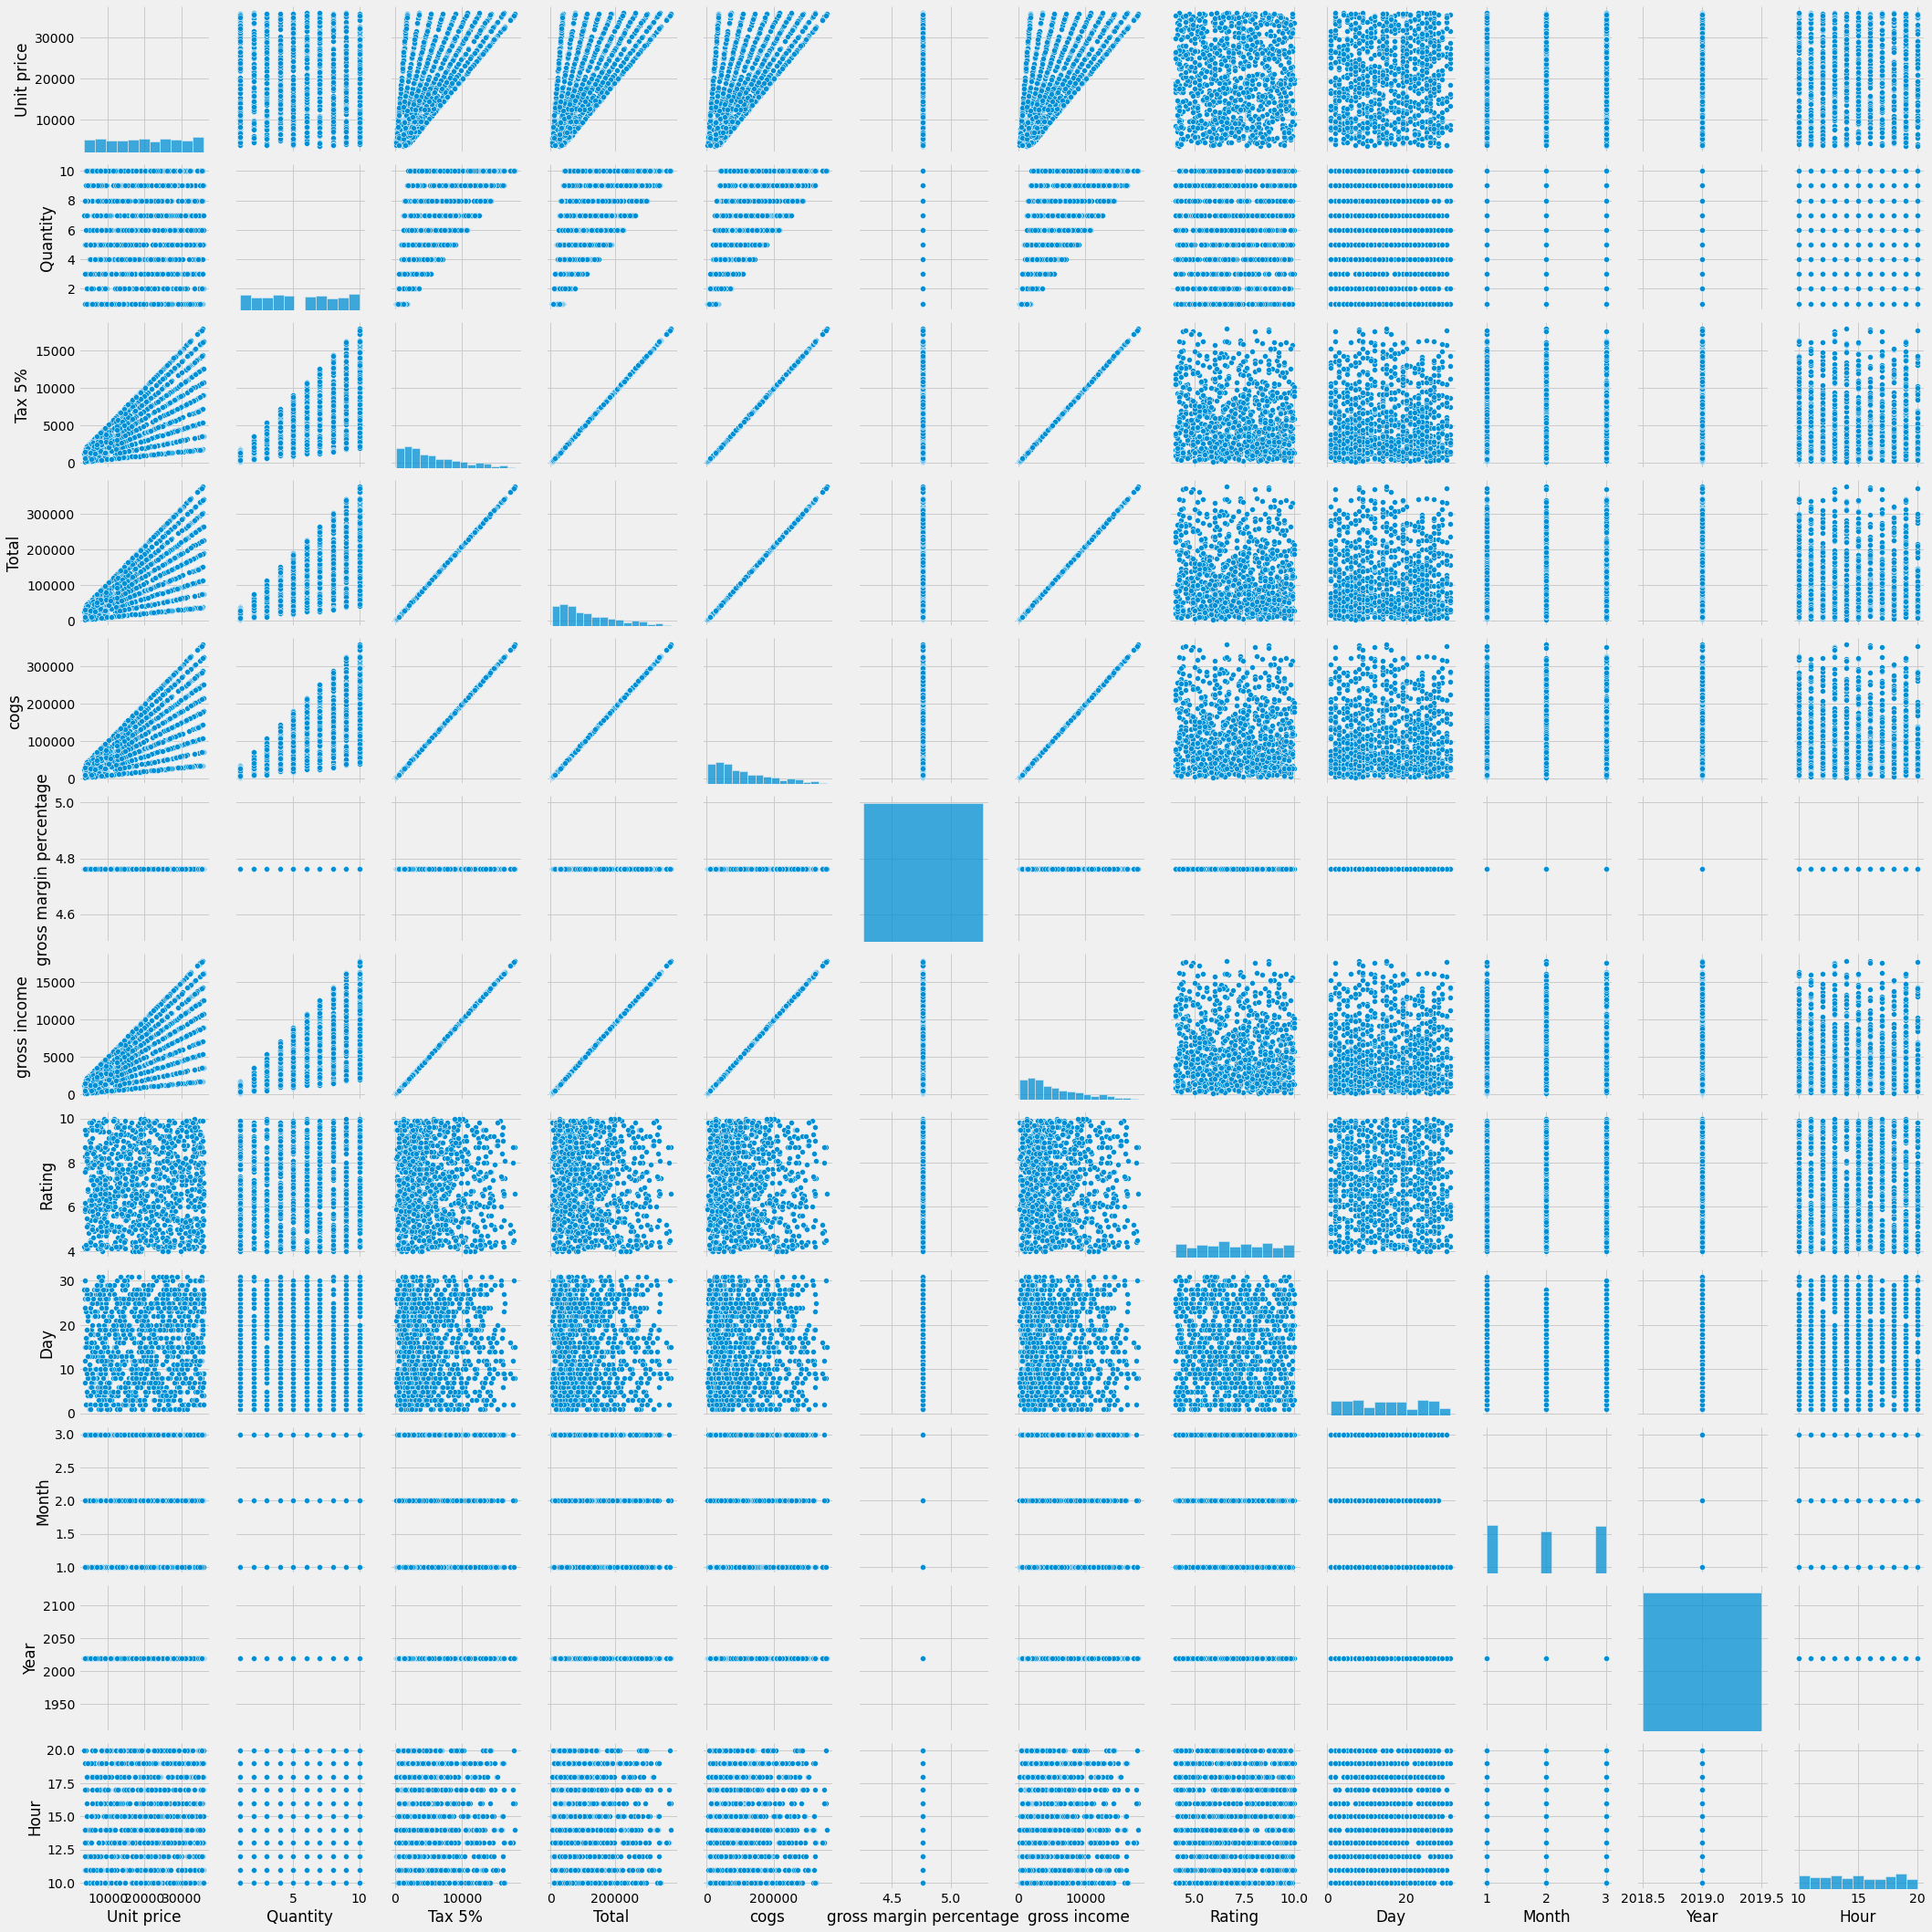

In [34]:
sns.pairplot(df)